In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
target_names = iris.target_names

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Train a KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.91


In [8]:
# Detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

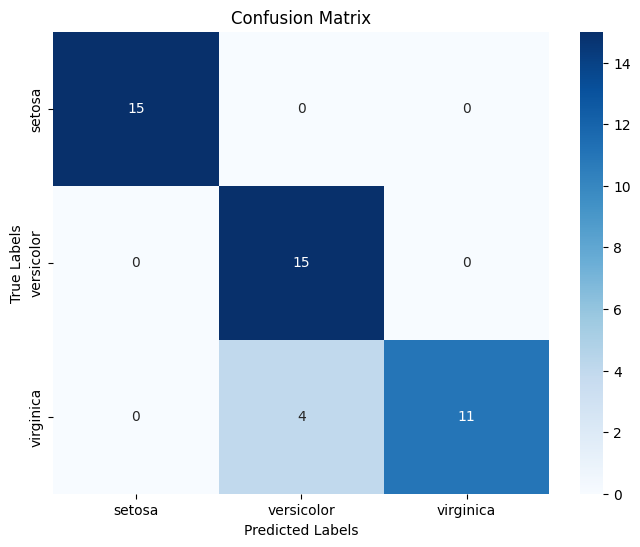

In [10]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [11]:
# Visualize decision boundary (2D for visualization purposes)
from matplotlib.colors import ListedColormap

In [13]:
# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]


knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier()

In [14]:
# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

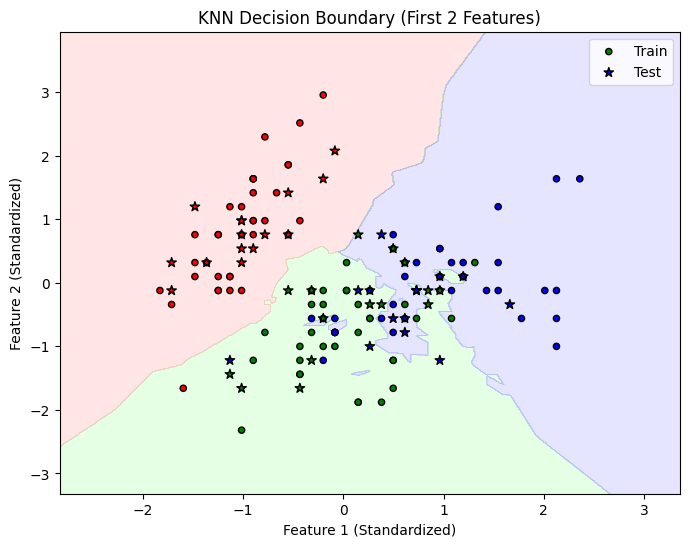

In [15]:
# Plot decision boundaries
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(cmap_bold), s=20, label="Train")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k', cmap=ListedColormap(cmap_bold), s=50, marker='*', label="Test")
plt.title("KNN Decision Boundary (First 2 Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()